# Lab 2 - Intro to Curve Fitting (Scipy/Numpy) and Plotting (Matplotlib)

##  The Photoelectric Effect and Projectile Motion
------------------------------------------------------------------------------------------------

### GitHub:

* Fork the Lab repository to your personal GitHub page.
* Sign into GitHub desktop (using options in the gearwheel) - open the Git Bash shell
* Clone/download the repository to your own directory
* Make a new branch, call it Version-0, this is where you will do your work - I am just learning how important this is!!!
* Save your work to the local machine regularly.
* Commit your work on this branch to GitHub regularly - you don't have to wait until the end of class.
* Remember to make additional branches (Version-1 and Version-2) following each pull request (see below).

### Grading: 
Recall we will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 9:15am, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus.   

In [2]:
#how to load in plotting to a Jupyter Notebook
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#A note on functions and array arithmetic - 
#several of you have noticed problems using the math module functions on numpy arrays.
#To avoid this problem, use the numpy versions of the functions.  
#For example:
import math
x=math.pi
print(math.sin(x))  #works great - notice what you get - what should you get ? (this is a preview for Ch 4)

x_array = math.pi*np.ones(4) #works fine
print(x_array)                #works fine
#print(math.sin(x_array))     #error
print(np.sin(x_array))        #works fine

1.2246467991473532e-16
[ 3.14159265  3.14159265  3.14159265  3.14159265]
[  1.22464680e-16   1.22464680e-16   1.22464680e-16   1.22464680e-16]


## Part 1: Fitting Millikan's Data w/ Least Squares Method 

Discuss your algorithm with your lab partner.  Since you'll be writing your own code today, you are welcome to disagree on the details.  On your own computer, code it up, following my suggestions from the pre-lab.  As you produce results, use markdown cells to present and describe your work.  *For example add a markdown cell to: describe the plotted data, comment on how good the fit appears, and how it relates to Einstein's model, the percent difference, etc.*

### Your solution to Part 1:
------------------------------------------------------------------------------------------------------------------

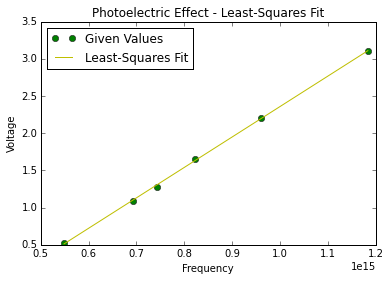

In [4]:
data = np.loadtxt("millikan.txt")    # Load in the exterior file that contains the two columns of data needed for data.

x = data[:,0]                        # Sets the first column of values to the array x and the second set to an array y .  
y = data[:,1]

Ex = sum(x) / float(len(x))          # Solve for the quantities defined by Newman that will be used later when using the 
Ey = sum(y) / float(len(x))          # least-square fit. These quantites are in averages of either one array two different
Exy = np.dot(x,y) / float(len(x))    # arrays or two of the same arrays, in this case the arrays are x and y.
Exx = np.dot(x,x) / float(len(x))       

m = (Exy-Ex*Ey)/(Exx-Ex**2)          # Solve for m and c which are the slope and y-intercept of the least-squares fit.
c = (Exx*Ey-Ex*Exy)/(Exx-Ex**2)

n = 0                                # Set n equal to zero to be used as a counter and also create and empty list to be appended.
y1 = []

while n < len(x):                    # A while loop that for each element in x takes the value using the equation and adds it to
    y1.append(m * x[n] + c)          # the end of the new list y1 until all the values in x are used then adding one to n each 
    n += 1                           # loop.
    
y_model = np.array(y1,float)         # Takes the list y1 and makes it an array.

plt.plot(x,y,"go",label = "Given Values")   # Plots the list x vs y  as circles and x vs y_model as a line then shows it.
plt.plot(x,y_model,"y-",label = "Least-Squares Fit")
plt.ylabel("Voltage")
plt.xlabel("Frequency")
plt.legend(loc = 'best')
plt.title("Photoelectric Effect - Least-Squares Fit")

In [5]:
h_actual = 6.626e-34                                   # Constant variables for Planck's constant and an electron.
e = 1.602e-19

h = m * e                                              # Solves for derives Planck's constant from the linear fit above.

Percent_diff = (abs(h - h_actual)) / h_actual * 100    # Calculates percent difference and prints it.
Percent_diff

1.1569539941886333

## Part 2: Curve Fitting Tutorial:
Open the Jupyter Notebook CurveFit.ipynb and work through the plots and exercises.  It is a very complete set of information that you should remember to consult for this and other classes.  No need to memorize all of the functions.

You may want to read Part 3 (below) and jump back and forth between the tutorial and applying each step to Millikan's data.

### Submit nothing for this section - However this is a dense document - ask a lot of questions and add comments to the document to help you reuse the functions as you go.  
-----------------------------------------------------------------------------------------------

## Part 3: Fitting Millikan's Data 
Use your new found knowledge from the Curve Fitting Tutorial to fit Millikan's Data with the various fitting routines in the tutorial.  Since it is linear data, it is a great test case to get you started.  Try three cases:
    * polynomial fits
    * linear regression (from the mathematical library scipy)
    * curve fits - even though your data fits a straight line, it is worth trying

To distinguish your new fits from those in part 1, give your new fit coefficients names that match the fit type.  For instance, back in Part 1, I named my coefficients ```m``` and ```b```.  In this section, I named my polynomial fit coefficients ```m_poly```, ```b_poly```.

### Your solution to Part 3:
-----------------------------------------------------------------------------------------------

### Polynomial Fits

In [6]:
fit, cov = np.polyfit(x, y, 1,cov=True)         # 
cov

array([[  5.52096639e-33,  -4.55625113e-18],
       [ -4.55625113e-18,   3.98807237e-03]])

In [7]:
m_poly = fit[0]
c_poly = fit[1]
print("m_poly =",m_poly," c_poly =",c_poly)

m_poly = 4.08822735852e-15  c_poly = -1.73123580398


In [8]:
dm = np.sqrt(cov[0,0])
dc = np.sqrt(cov[1,1])
print("dm = {:.3f}   dc = {:.3f}".format(dm,dc))

dm = 0.000   dc = 0.063


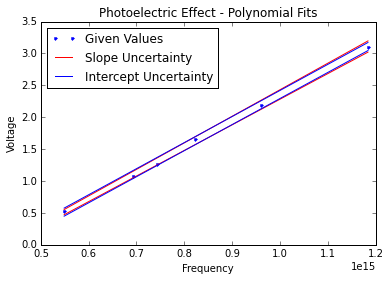

In [9]:
plt.plot(x,y,".",label = "Given Values")                                 # Plots the given values along with four other lines. 
plt.plot(x,(m_poly+dm)*x + c_poly,"r",label = "Slope Uncertainty")       # The red two being lines with the uncertainty in the  
plt.plot(x,(m_poly-dm)*x + c_poly,"r")                                   # slope and the two blue lines are the uncertainty in 
plt.plot(x,m_poly*x + c_poly + dc,"b",label = "Intercept Uncertainty")   # the y-intercept.
plt.plot(x,m_poly*x + c_poly - dc,"b")
plt.legend(loc = 'best')
plt.ylabel("Voltage")
plt.xlabel("Frequency")
plt.title("Photoelectric Effect - Polynomial Fits")

### Linear Regression

In [10]:
from scipy.stats import linregress

regresfit = linregress(x,y)                   # This uses the function linregress to evaluate the data and calculate the array
print("Slope = ",regresfit[0])                # of values that are being printed.
print("y-intercept = ",regresfit[1])
print("r value = ",regresfit[2])
print("p value = ",regresfit[3])
print("Standard Deviation = ",regresfit[4])

Slope =  4.08822735852e-15
y-intercept =  -1.73123580398
r value =  0.999669835862
p value =  1.6349454156e-07
Standard Deviation =  5.25403006776e-17


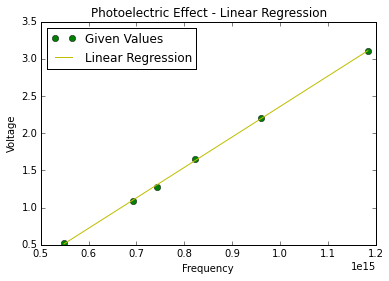

In [11]:
n1 = 0                                                  # Set n equal to zero to be used as a counter and also create and empty
y_lin = []                                              # list to be appended.

while n1 < len(x):                                      # A while loop that for each element in x takes the value using the 
    y_lin.append(regresfit[0] * x[n1] + regresfit[1])   # equation and adds it to the end of the new list y_lin until all the  
    n1 += 1                                             # values in x are used then adding one to n each loop.
    
y_linreg = np.array(y1,float)                           # Takes the list y_lin and makes it an array.

plt.plot(x,y,"go",label = "Given Values")               # Plots the list x vs y  as circles and x vs y_model as a line then 
plt.plot(x,y_linreg,"y-",label = "Linear Regression")
plt.legend(loc = 'best')                                # shows it.
plt.ylabel("Voltage")          
plt.xlabel("Frequency")
plt.title("Photoelectric Effect - Linear Regression")

### Curve Fit

[  4.08822736e-15  -1.73123580e+00]


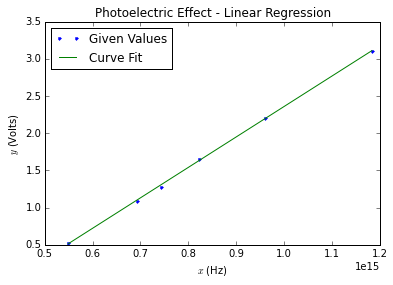

In [16]:
# I added this curve fit which I did not have in either version 1 or version 0
from scipy.optimize import curve_fit

# Define a function that creates a linear curve fit
def func(x1, a, b):
    return a * x1 + b

# Finds the parameters of the curve along with the covariance
parameters, covariance = curve_fit(func, x, y)

# This creates the points y for the linear fit above
yfit = func(x, *parameters) 
# the splat operator unpacks an array into function arguments

plt.plot(x,y,".",label="Given Values")
plt.plot(x,yfit,label="Curve Fit")
plt.legend(loc = 'best')

# Labels the x and y axis
plt.xlabel(r"$x$ (Hz)")
plt.ylabel("$y$ (Volts)")
plt.title("Photoelectric Effect - Linear Regression")

print(parameters)

## Part 4: Fitting Projectile Motion Data

1.  Generate some 1D projectile motion data.  You are encouraged to use the function provided in Weekly Session 2. 

2. Add some "noise" to the data with a random variable. Plot the original function (without noise) and the noisy "data" with the scatter() function.  Use some of the tips/tricks on modifying scatter plots that are linked in Weekly Session 2.
3. Note that you have two plots to make - $x$ vs. $t$ and $v$ vs. $t$. Use this [link](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py) to learn how to make subplots.

4. Perform a curve fit to your noisy "data" and anaylze the error in the fit (i.e. the difference between the fit result and the original (noiseless) function. Compare the fit parameters to your original parameters using the standard deviation in the fit parameters. How close does the fit get to your original parameters? Repeat the analysis to generate new random data and compare again.

### Your solution to Part 4:
-----------------------------------------------------------------------------------------------

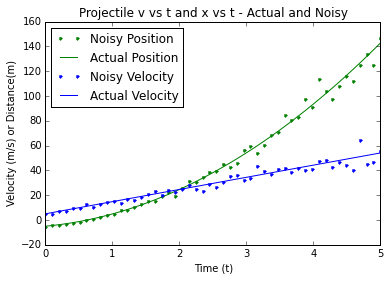

In [26]:
import random

# Define a function that simulates the position and velocity curves of a projectile in motion
def position(t, a, v_i=0, x_i=0):
    x=x_i+v_i*t+0.5*a*t**2
    v=v_i+a*t
    return x,v

# Set the constants
t1=0.0    #s
x1 = -5.0 #m
v1 = 5.0  #m/s
a1 = 9.81 #m/s^2

t = np.linspace(0,5,50)

# Create data points that have some sort of randomness to simulate data taken in the field
x,v = position(t,a1,v_i=v1,x_i=x1)
x_data = x * (1.0 + 0.1*np.random.normal(size=len(x)))
v_data = v * (1.0 + 0.1*np.random.normal(size=len(v)))

# Plot both the sets of noisy points along with the actual curves to see how they relate to one another
plt.plot(t,x_data,"g.",label = "Noisy Position")
plt.plot(t,x,"g-",label = "Actual Position")
plt.plot(t,v_data,"b.", label = "Noisy Velocity")
plt.plot(t,v,"b-", label = "Actual Velocity")
plt.legend(loc = 'best')                                
plt.ylabel("Velocity (m/s) or Distance(m)")          
plt.xlabel("Time (t)")
plt.title("Projectile v vs t and x vs t - Actual and Noisy")

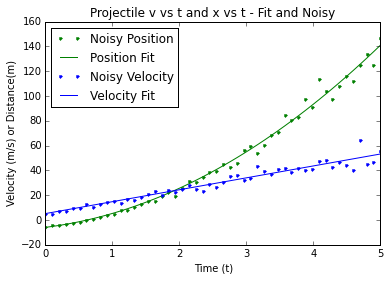

In [31]:
# Define functions that when given a set of values for t and the other parameters will out put a set of velocity and 
# position points based off of a line equation and a parabolic equation
def position_fit(t,a,b,c):
    return (a/2)*t**2+b*t+c

def velocity_fit(t,a,b):
    return a*t+b

# Use the data from the noisy sets and find the parameters needed for the functions above to create the best fit
parameters_x, covariance_x = curve_fit(position_fit, t, x_data)
parameters_v, covariance_v = curve_fit(velocity_fit, t, v_data)

# Use the parameters obtained to create position and valocity points for the curve fit
x_fit = position_fit(t,*parameters_x)
v_fit = velocity_fit(t,*parameters_v)

# Plot both the fit and the noisy set of points to see how they compare
plt.plot(t,x_data,"g.",label = "Noisy Position")
plt.plot(t,x_fit,"g-",label = "Position Fit")
plt.plot(t,v_data,"b.", label = "Noisy Velocity")
plt.plot(t,v_fit,"b-", label = "Velocity Fit")
plt.legend(loc = 'best')                                
plt.ylabel("Velocity (m/s) or Distance(m)")          
plt.xlabel("Time (t)")
plt.title("Projectile v vs t and x vs t - Fit and Noisy")


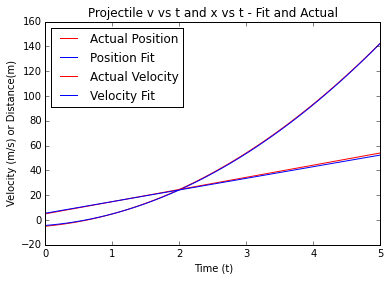

In [29]:
plt.plot(t,x,"r-",label = "Actual Position")
plt.plot(t,x_fit,"b-",label = "Position Fit")
plt.plot(t,v,"r-", label = "Actual Velocity")
plt.plot(t,v_fit,"b-", label = "Velocity Fit")
plt.legend(loc = 'best')                                
plt.ylabel("Velocity (m/s) or Distance(m)")          
plt.xlabel("Time (t)")
plt.title("Projectile v vs t and x vs t - Fit and Actual")


## Post lab questions

Describe briefly Millikan's experiment in your own words.  Be sure to explain these two main points.

1.  What is $\nu$, and why is it the independent variable in the experiment?  Did Millikan use $\nu$ in the           visible, infrared, or ultraviolet spectrum?  Here is a [reference](http://hyperphysics.phy-astr.gsu.edu/hbase/ems3.html) for light energies.
    
2.  What does $V$ measure, and why is it the dependent variable in the experiment?  
-----------------------------------------------------------------------------------------------

#### 1.
This is the frequency and it is the independent variable because it is very easy to change and text differency frequencies. Looking at the graph it appears that milikan used infrared light when doing the experiment.

#### 2.
The V represents the the Voltage and it is the way of determining the amount of energy and it is dependent because the photons hitting the metal surface exciting the electrons are what cause the energy so without the photons hitting the plate there would be no energy.

## With any remaining time 

* Play with "tricking out" your plots using the matplotlib gallery - which is one of my favorite places on the interwebs. Click on the [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py) and use it as a guide to modify your scatter plot.  Once you're done with that, play with the markers as well - you can change their shape! [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py)

* Work on HW6 - which includes finishing all of the exercises in Weekly Session 2